In [8]:
from sklearn.utils import safe_indexing except importError:from sklearn.utils import_safe_indexing

SyntaxError: invalid syntax (<ipython-input-8-5828c6880485>, line 1)

In [4]:
 from sklearn\utils\__init__.py


SyntaxError: unexpected character after line continuation character (<ipython-input-4-cf0ac09ff04a>, line 1)

In [1]:
!pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge,Lasso

In [3]:
from yellowbrick.regressor import PredictionError,ResidualsPlot,residuals_plot

In [5]:
df=pd.read_csv('insurance.csv')
df.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1001,19,female,27.900,0,yes,southwest,16884.92400
1,1002,18,male,33.770,1,no,southeast,1725.55230
2,1003,28,male,33.000,3,no,southeast,4449.46200
3,1004,33,male,22.705,0,no,northwest,21984.47061
4,1005,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [7]:
mod=smf.ols('charges~sex',data=df).fit()
aov_table1=sm.stats.anova_lm(mod,type=2)
print(aov_table1)

              df        sum_sq       mean_sq         F    PR(>F)
sex          1.0  6.435902e+08  6.435902e+08  4.399702  0.036133
Residual  1336.0  1.954306e+11  1.462804e+08       NaN       NaN


In [8]:
mod1=smf.ols('charges~smoker',data=df).fit()
aov_table2=sm.stats.anova_lm(mod1,type=2)
print(aov_table2)

              df        sum_sq       mean_sq            F         PR(>F)
smoker       1.0  1.215199e+11  1.215199e+11  2177.614868  8.271436e-283
Residual  1336.0  7.455432e+10  5.580413e+07          NaN            NaN


In [9]:
mod2=smf.ols('charges~region',data=df).fit()
aov_table3=sm.stats.anova_lm(mod2,type=2)
print(aov_table3)

              df        sum_sq       mean_sq         F    PR(>F)
region       3.0  1.300760e+09  4.335866e+08  2.969627  0.030893
Residual  1334.0  1.947735e+11  1.460071e+08       NaN       NaN


In [10]:
mod4=smf.ols('charges~sex+smoker+region',data=df).fit()
aov_table4=sm.stats.anova_lm(mod4,type=2)
print(aov_table4)

              df        sum_sq       mean_sq            F         PR(>F)
sex          1.0  6.435902e+08  6.435902e+08    11.515360   7.105027e-04
smoker       1.0  1.208777e+11  1.208777e+11  2162.790442  2.785765e-281
region       3.0  1.078004e+08  3.593345e+07     0.642935   5.874561e-01
Residual  1332.0  7.444510e+10  5.588971e+07          NaN            NaN


In [11]:
x=df.drop(['id','charges'],axis=1)
y=df['charges']

In [12]:
olsmodel=smf.ols(formula='charges~age+sex+bmi+children+smoker+region',data=df).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:55:07   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

In [13]:
ypred=olsmodel.predict(x)
ypred

0       25293.713028
1        3448.602834
2        6706.988491
3        3754.830163
4        5592.493386
            ...     
1333    12351.323686
1334     3511.930809
1335     4149.132486
1336     1246.584939
1337    37085.623268
Length: 1338, dtype: float64

In [14]:
from sklearn.metrics import r2_score
r2_score(y,ypred)

0.7509130345985207

In [15]:
error1=df.charges-ypred
error1

0       -8408.789028
1       -1723.050534
2       -2257.526491
3       18229.640447
4       -1725.638186
            ...     
1333    -1750.775386
1334    -1305.950009
1335    -2519.298986
1336      761.360061
1337    -7944.262968
Length: 1338, dtype: float64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\SURESH A\Downloads\pythonnew\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


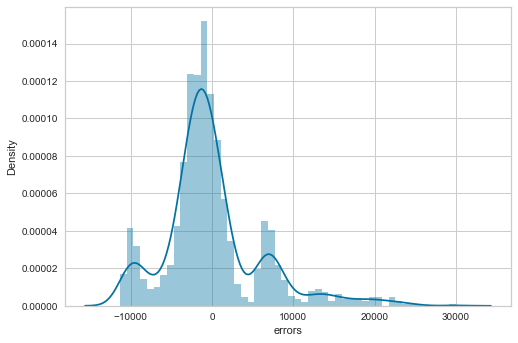

In [17]:
sns.distplot(error1)
plt.xlabel('errors')
plt.show()

C:\Users\SURESH A\Downloads\pythonnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


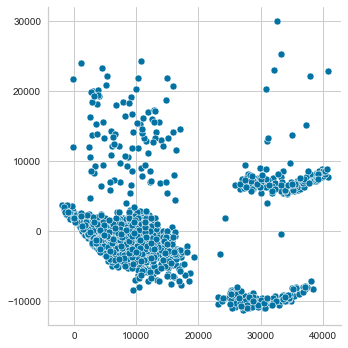

In [18]:
sns.relplot(ypred,error1)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [20]:
x1=df.drop('charges',axis=1)
y1=df['charges']

In [21]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.25,random_state=47)

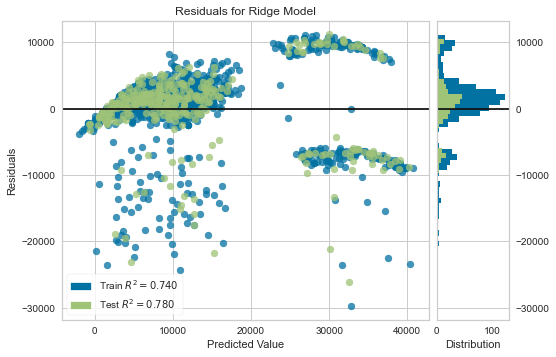

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
model=Ridge()
vis=ResidualsPlot(model)

vis.fit(xtrain,ytrain)
vis.score(xtest,ytest)
vis.show()

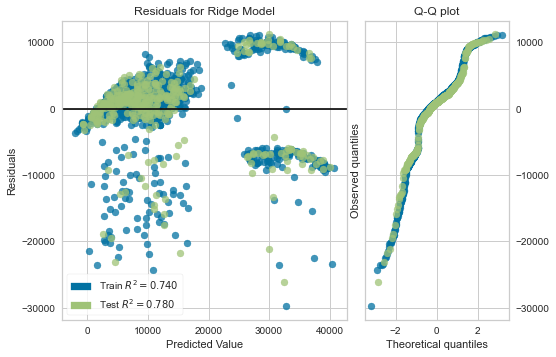

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
model=Ridge()
vis=ResidualsPlot(model,hist=False,qqplot=True)

vis.fit(xtrain,ytrain)
vis.score(xtest,ytest)
vis.show()

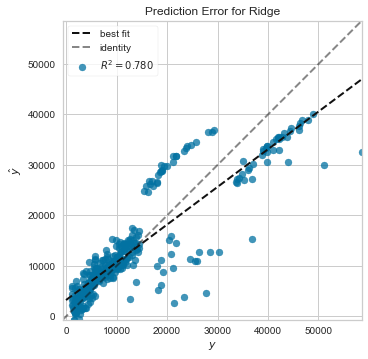

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [23]:
pre=PredictionError(model)

pre.fit(xtrain,ytrain)
pre.score(xtest,ytest)
pre.show()

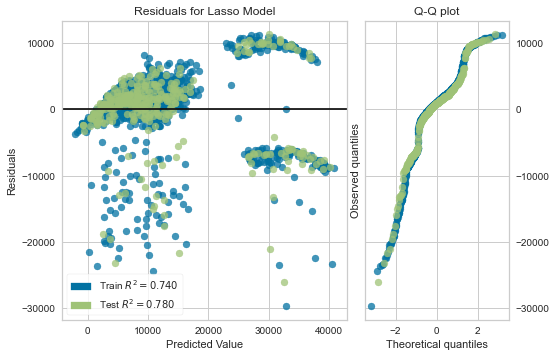

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [24]:
model1=Lasso()
vis1=ResidualsPlot(model1,hist=False,qqplot=True)

vis1.fit(xtrain,ytrain)
vis1.score(xtest,ytest)
vis1.show()

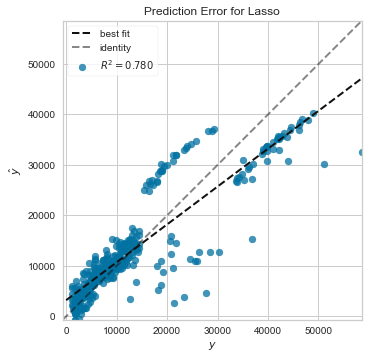

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [25]:
pre1=PredictionError(model1)
pre1.fit(xtrain,ytrain)
pre1.score(xtest,ytest)
pre1.show()